In [2]:
# import required packages
import cv2
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from keras.models import model_from_json
import keras.utils as image 
import pandas as pd  
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
# Initialize image data generator with rescaling
train_data_gen = ImageDataGenerator(rescale=1./255)
validation_data_gen = ImageDataGenerator(rescale=1./255)

In [4]:
# Preprocess all test images
train_generator = train_data_gen.flow_from_directory(
        'data/train',
        target_size=(48, 48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

Found 28709 images belonging to 7 classes.


In [5]:
# Preprocess all train images
validation_generator = validation_data_gen.flow_from_directory(
        'data/test',
        target_size=(48, 48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

Found 7178 images belonging to 7 classes.


In [6]:
# Load emotion recognition model
from tensorflow.keras.optimizers import Adam, Adamax

model = model_from_json(open("E:\\CS\\Emotion_Detection\\model\\emotion_model.json", "r").read())
checkpoint_path = model.load_weights('E:\\CS\\Emotion_Detection\\model\\emotion_model.h5')
learning_rate=.001 # start with this learning rate
model.compile(
                  Adamax(learning_rate=learning_rate), 
                  loss='categorical_crossentropy', 
                  metrics=['accuracy']
                  )

# View the model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 44, 44, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 22, 22, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 22, 22, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 20, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 128)      0         
 2D)                                                    

# Data preparation

In [7]:
# Read all files from folders
import os, sys, time, warnings, sklearn
ROOT='E:\\CS\\Emotion_Detection\\data'
# Specify important directories
TRAIN_PATH=ROOT+'\\train'
TEST_PATH=ROOT+'\\test'

# Model Evaluation

In [8]:
# Evaluate the model
loss, acc = model.evaluate(train_generator, verbose=2)

449/449 - 411s - loss: 0.1241 - accuracy: 0.9842 - 411s/epoch - 914ms/step


In [9]:
# Evaluate the model
loss, acc = model.evaluate(validation_generator, verbose=2)

113/113 - 95s - loss: 1.2282 - accuracy: 0.6229 - 95s/epoch - 837ms/step


# Prediction on Test Images 

113/113 [==============================] - 10s 87ms/step


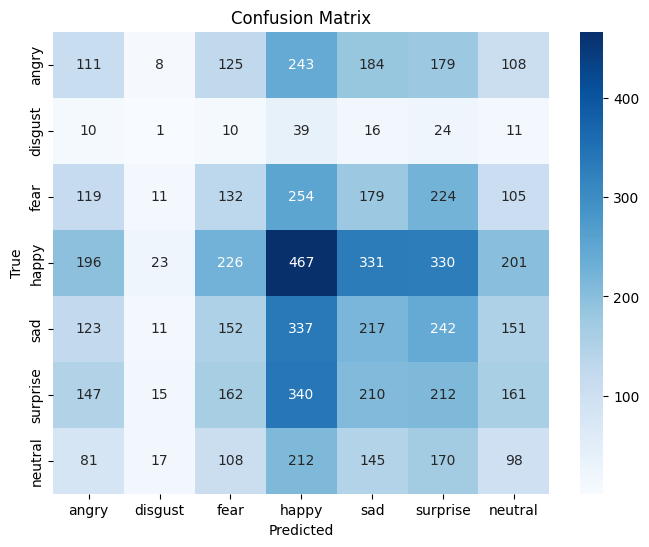

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

def show_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    labels = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

# Dự đoán trên tập validation
y_pred = model.predict(validation_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = validation_generator.classes

# Hiển thị ma trận bối rối dưới dạng hình ảnh
show_confusion_matrix(y_true, y_pred_classes)


# Print Predicted Images: Unshuffled Test Set

In [ ]:
import matplotlib.pyplot as plt

test_images, test_labels = next(validation_generator)
preds = model.predict(test_images)
# One hot conversion
label_prep = np.argmax(preds, axis = 1)
label_test = np.argmax(test_labels, axis = 1)
# Reshape
label_prep = label_prep.reshape((-1, 1))
label_test = np.reshape(label_test, (len(label_test), 1))

print('correct prediction:', np.sum((label_test == label_prep)*1)/test_batch_size,'\n')


def compare(label_prep, gen=train_generator):
    class_dictionary = gen.class_indices
    for key, value in class_dictionary.items():
        if value == label_prep:
             return key

def dif(label_test, label_prep, gen=train_generator):    
    class_dictionary = gen.class_indices
    test = ''
    id = ''
    for key, value in class_dictionary.items():
        if value == label_test:
            test = key
        if value == label_prep:
            id = key
    return test, id

#Code by Hitesh Kumar https://www.kaggle.com/hitzz97/emotion-detection

fig = plt.figure(figsize=((30, 40)))

# k = 0
for j in range(min(len(label_prep), 35)):
    ax = plt.subplot(7, 5, j+1)
    px = test_images[j]/255
#   k += 1
    ax.imshow(px)
    ax.set_xticks([])
    ax.set_yticks([])
    
    if label_test[j] == label_prep[j]:
        for axis in ['top','bottom','left','right']:
            ax.spines[axis].set_linewidth(15)
            ax.spines[axis].set_color('green')
        ax.set_title(
                    compare(label_prep[j]),
                    color='green', 
                    fontsize=35
                     )

    else:
        for axis in ['top','bottom','left','right']:
            ax.spines[axis].set_linewidth(15)
            ax.spines[axis].set_color('red')
        ax.set_title(
                    'Pred:'+dif(label_test[j], label_prep[j])[1]+" | Act:"+ dif(label_test[j], label_prep[j])[0],
                    color='red', 
                    fontsize=35
                    )
    plt.tight_layout()